In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers

In [3]:
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [5]:
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
dataset.take(1) #return batch of 32

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
len(dataset)

68

In [9]:
for image_batch, labels_batch in dataset:
    print(image_batch.shape)
    print(labels_batch.numpy())
    #dataset  ki jagah dataset.take(1) se lenge to batch  se he image aaege and 3 is for rgb

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]
(32, 256, 256, 3)
[1 0 0 1 1 0 1 0 0 1 0 2 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0]
(32, 256, 256, 3)
[1 1 1 2 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 2 2 1 0 0 1 0 1 1 2 0 1 1]
(32, 256, 256, 3)
[1 0 1 1 1 1 1 0 0 0 0 1 2 1 0 2 0 0 1 0 0 1 1 1 1 0 2 1 0 1 2 1]
(32, 256, 256, 3)
[1 1 1 0 1 0 1 0 2 1 1 1 0 0 2 2 0 0 0 0 1 0 2 0 1 0 1 0 1 0 1 0]
(32, 256, 256, 3)
[1 0 2 0 1 1 0 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 2 0 1 1 1 1 1]
(32, 256, 256, 3)
[1 0 1 0 0 1 1 0 1 2 1 1 0 0 2 2 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1]
(32, 256, 256, 3)
[1 1 0 0 0 0 0 1 1 0 1 1 2 1 1 2 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 2]
(32, 256, 256, 3)
[0 0 1 2 0 0 2 0 0 1 1 1 1 1 1 1 1 1 0 1 2 0 0 1 0 1 2 0 1 1 1 1]
(32, 256, 256, 3)
[0 2 0 1 0 1 1 0 1 1 2 0 0 0 1 0 2 0 0 0 2 0 0 0 1 1 0 1 1 1 0 0]
(32, 256, 256, 3)
[1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0]
(32, 256, 256, 3)
[0 0 1 2 1 0 1 2 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 2 1 1

In [12]:
32*68

2176

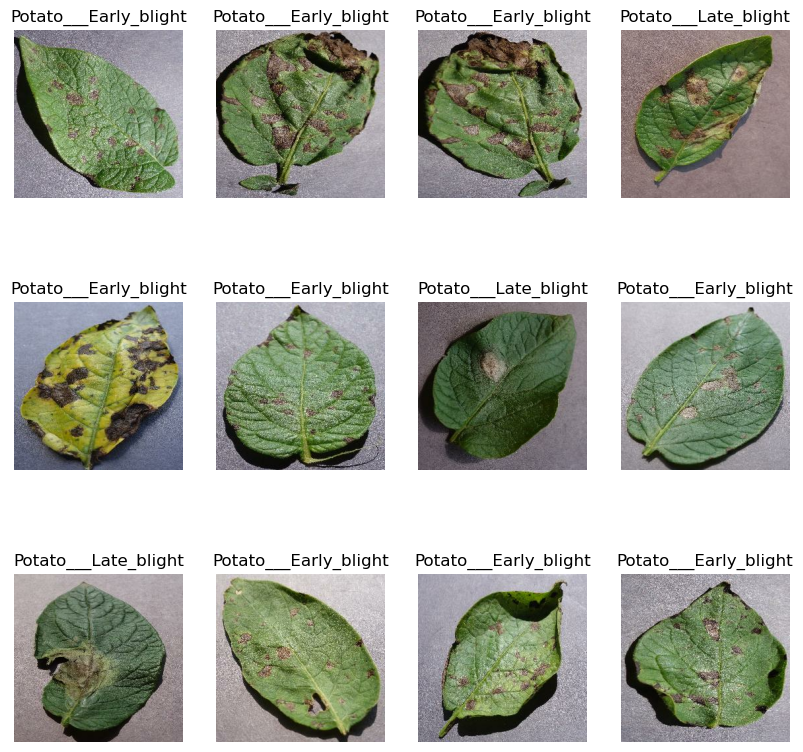

In [10]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
import numpy as np

In [20]:
//80% ==> Traing
//20% ==> test
// 10% ==>validation
// 10% ==> test

SyntaxError: invalid syntax (3107819472.py, line 1)

In [12]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [13]:
len(dataset)

68

In [20]:
68*32 #nearly equal to 2152

2176

In [24]:
2152/32
#1 batch me 32 images h

67.25

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [22]:
val_size=0.1
len(dataset)*val_size

215.20000000000002

In [16]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds)

54

In [30]:
len(val_ds)

6

In [31]:
len(test_ds)

8

In [32]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [34]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [35]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [36]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [39]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 36s 666ms/step - loss: 0.1804 - accuracy: 0.9349 - val_loss: 0.1577 - val_accuracy: 0.9479
Epoch 2/50
54/54 [==============================] - 33s 598ms/step - loss: 0.1741 - accuracy: 0.9337 - val_loss: 0.1179 - val_accuracy: 0.9479
Epoch 3/50
54/54 [==============================] - 31s 561ms/step - loss: 0.1763 - accuracy: 0.9331 - val_loss: 0.0946 - val_accuracy: 0.9635
Epoch 4/50
54/54 [==============================] - 31s 577ms/step - loss: 0.1503 - accuracy: 0.9419 - val_loss: 0.1698 - val_accuracy: 0.9427
Epoch 5/50
54/54 [==============================] - 30s 557ms/step - loss: 0.1289 - accuracy: 0.9484 - val_loss: 0.0728 - val_accuracy: 0.9740
Epoch 6/50
54/54 [==============================] - 31s 569ms/step - loss: 0.1212 - accuracy: 0.9589 - val_loss: 0.0944 - val_accuracy: 0.9583
Epoch 7/50
54/54 [==============================] - 30s 558ms/step - loss: 0.0985 - accuracy: 0.9654 - val_loss: 0.1037 - val_accuracy: 0.9583

In [41]:
scores = model.evaluate(test_ds)



8/8 [==============================] - 4s 217ms/step - loss: 1.0930 - accuracy: 0.4766


In [43]:
history

In [45]:
history.history['accuracy']

[0.9348591566085815,
 0.9336854219436646,
 0.9330986142158508,
 0.9419013857841492,
 0.9483568072319031,
 0.9589201807975769,
 0.9653756022453308,
 0.96772301197052,
 0.9600939154624939,
 0.9583333134651184,
 0.9630281925201416,
 0.9759389758110046,
 0.9712441563606262,
 0.9753521084785461,
 0.9747652411460876,
 0.9512910842895508,
 0.9606807231903076,
 0.9753521084785461,
 0.9694835543632507,
 0.9489436745643616,
 0.9636150002479553,
 0.9765258431434631,
 0.9694835543632507,
 0.9847418069839478,
 0.9794601202011108,
 0.9835680723190308,
 0.9876760840415955,
 0.9894366264343262,
 0.9853286147117615,
 0.9900234937667847,
 0.9853286147117615,
 0.9788732528686523,
 0.9888497591018677,
 0.9771126508712769,
 0.9812206625938416,
 0.9923709034919739,
 0.9847418069839478,
 0.9906103014945984,
 0.9888497591018677,
 0.987089216709137,
 0.9776995182037354,
 0.987089216709137,
 0.9894366264343262,
 0.9953051805496216,
 0.9876760840415955,
 0.9800469279289246,
 0.9953051805496216,
 0.99647885560989

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

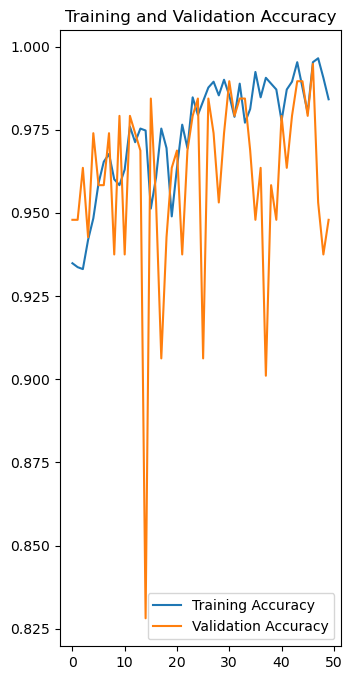

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


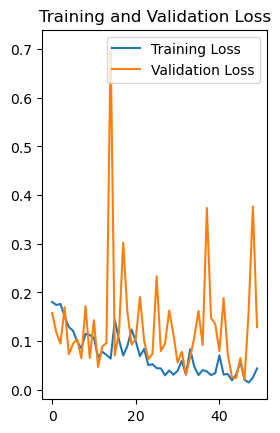

In [48]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 720ms/step
predicted label: Potato___Early_blight


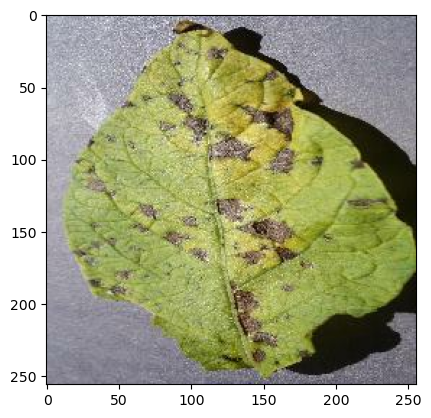

In [49]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


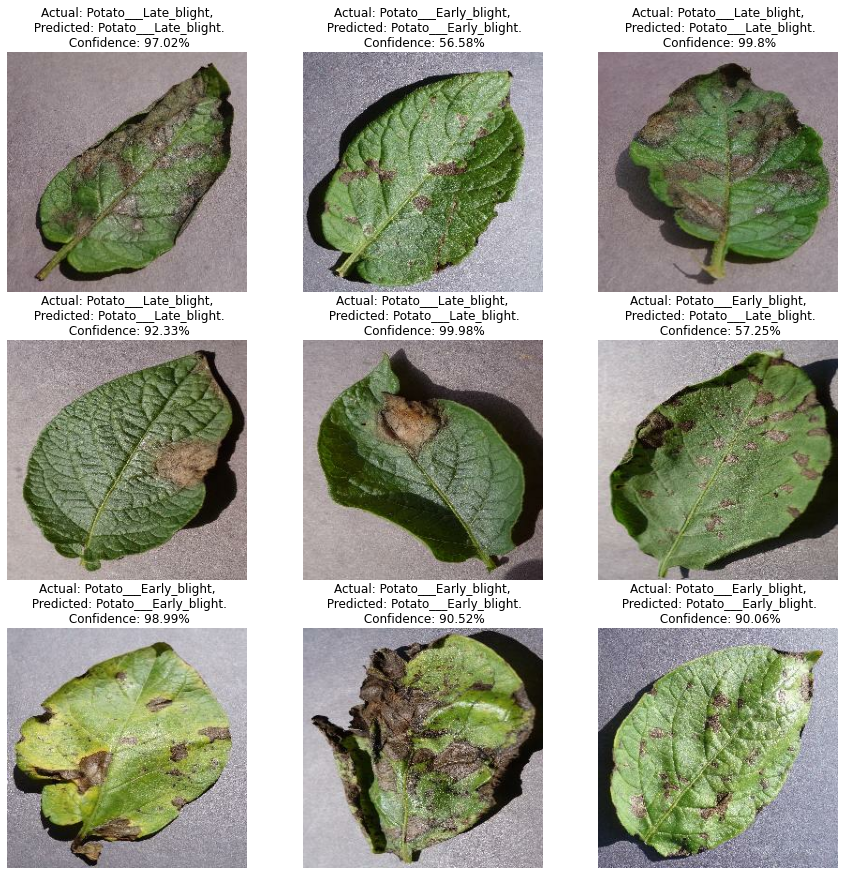

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [51]:

#model_version= 2
#model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [52]:

#import os
#os.listdir(f"../models")


['1', '2']

In [54]:
#automatically increase directory
model_version= max([int(i) for i in os.listdir(f"../models") + [0]])+1